# Efficiency Plots for 2017:

Check efficiency plots w.r.t the reference (noringer)

In [2]:
from kepler.pandas.menu       import ElectronSequence as Chain
from kepler.pandas.readers    import load, load_in_loop, load_hdf
from core import Efficiency, restore_efficiencies
from Gaugi import mkdir_p, progressbar
import numpy as np
import pandas as pd
import collections
import os
import rootplotlib as rpl
from pprint import pprint
from copy import deepcopy
import gc
from ROOT import kBlack,kBlue,kRed,kAzure,kGreen,kMagenta,kCyan,kOrange,kGray,kYellow,kWhite,TColor,gStyle

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1) Read all files:

In [3]:
output_path = 'output/efficiencies'
mkdir_p(output_path)
version = 'v12'
ref = 'v8'

In [4]:
eff_data17_Zee_ref = restore_efficiencies( '../%s/output/emulation/data17_Zee_efficiency_%s.root'%(ref,ref))

In [5]:
eff_data17_Zee_ref.triggers

['HLT_e140_lhloose_nod0_ringer_v8',
 'HLT_e17_lhvloose_nod0_ringer_v8_L1EM15VHI',
 'HLT_e28_lhtight_nod0_ringer_v8_ivarloose',
 'HLT_e60_lhmedium_nod0_ringer_v8_L1EM24VHI']

In [6]:
eff_data17_Zee_test = restore_efficiencies( 'output/emulation/data17_Zee_efficiency_%s.root'%version)

In [7]:
eff_data17_Zee_test.triggers

['HLT_e140_lhloose_nod0_ringer_v12',
 'HLT_e17_lhvloose_nod0_ringer_v12_L1EM15VHI',
 'HLT_e28_lhtight_nod0_ringer_v12_ivarloose',
 'HLT_e60_lhmedium_nod0_ringer_v12_L1EM24VHI']

In [8]:
eff_data17_JF17_ref = restore_efficiencies( '../%s/output/emulation/data17_JF17_efficiency_%s.root'%(ref,ref))

In [9]:
eff_data17_JF17_test = restore_efficiencies( 'output/emulation/data17_JF17_efficiency_%s.root'%version)

In [10]:
def add_legend(x, y, legends):
    rpl.add_legend( legends,x,y,x+0.98,y+0.20,textsize=18, option='p' )

## 2) HLT_e28:

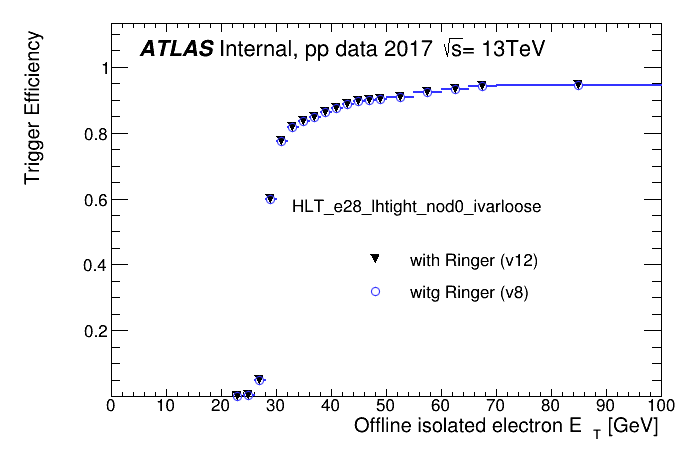

In [11]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_test.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%version, 'HLT','et'),
            eff_data17_Zee_ref.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%ref, 'HLT','et'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.49,0.35,['with Ringer (%s)'%version, 'witg Ringer (%s)'%ref] )
rpl.add_text( 0.42, 0.55, 'HLT_e28_lhtight_nod0_ivarloose', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_%s_2017_HLT_et.pdf'%version)

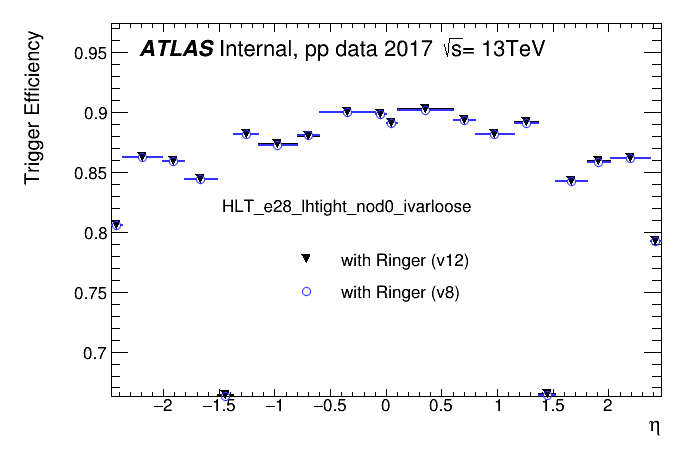

In [12]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_test.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%version, 'HLT','eta'),
            eff_data17_Zee_ref.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%ref, 'HLT','eta'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.39,0.35,['with Ringer (%s)'%version, 'with Ringer (%s)'%ref] )
rpl.add_text( 0.32, 0.55, 'HLT_e28_lhtight_nod0_ivarloose', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.08) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_%s_2017_HLT_eta.pdf'%version)

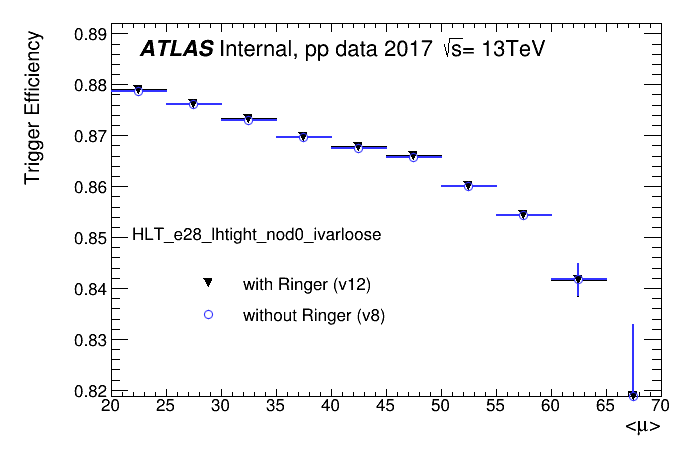

In [13]:
colors = [kBlack,kBlue-4]
markers = [23, 24]

hists = [
            eff_data17_Zee_test.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%version, 'HLT','mu'),
            eff_data17_Zee_ref.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%ref, 'HLT','mu'),
        ]


hists = [ rpl.hist1d.rebin( h , 10, 20, 70 ) for h in hists ]


fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '<#mu>', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.25,0.3,['with Ringer (%s)'%version, 'without Ringer (%s)'%ref] )
rpl.add_text( 0.19, 0.49, 'HLT_e28_lhtight_nod0_ivarloose', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.015) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_%s_2017_HLT_mu.pdf'%version)


### 2.1) Check fake rejection for FastCalo step:

**NOTE**: For Run-2, to get the fast-calo boolean, point the histogram to L2

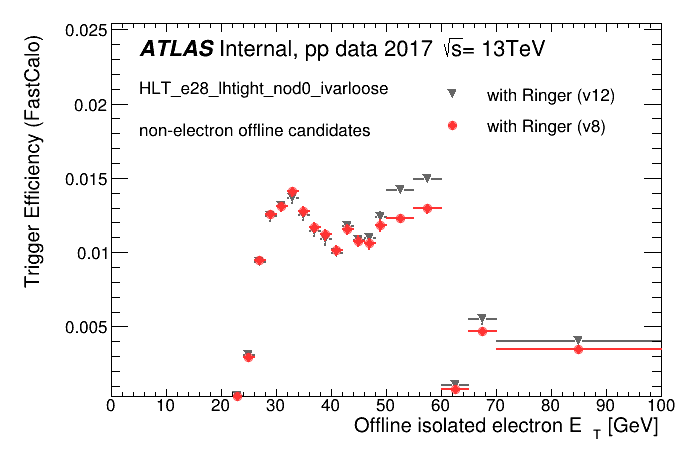

In [14]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            eff_data17_JF17_test.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%version, 'L2Calo','et'),
            eff_data17_JF17_ref.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%ref, 'L2Calo','et'),
        ]


fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, 'HLT_e28_lhtight_nod0_ivarloose', textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
add_legend( 0.6, 0.7, ['with Ringer (%s)'%version, 'with Ringer (%s)'%ref] )
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.7 )
fig.show()

fig.savefig(output_path+'/eff_emu_EGAM7_e28_ringer_%s_2017_L2Calo_et.pdf'%version)

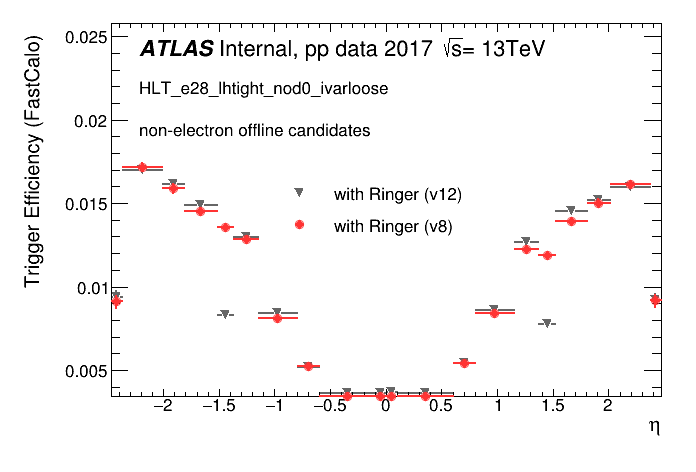

In [15]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            eff_data17_JF17_test.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%version, 'L2Calo','eta'),
            eff_data17_JF17_ref.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%ref, 'L2Calo','eta'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, 'HLT_e28_lhtight_nod0_ivarloose', textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
add_legend( 0.38, 0.49, ['with Ringer (%s)'%version, 'with Ringer (%s)'%ref] )
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.5 )
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM7_e28_ringer_%s_2017_L2Calo_eta.pdf'%version)

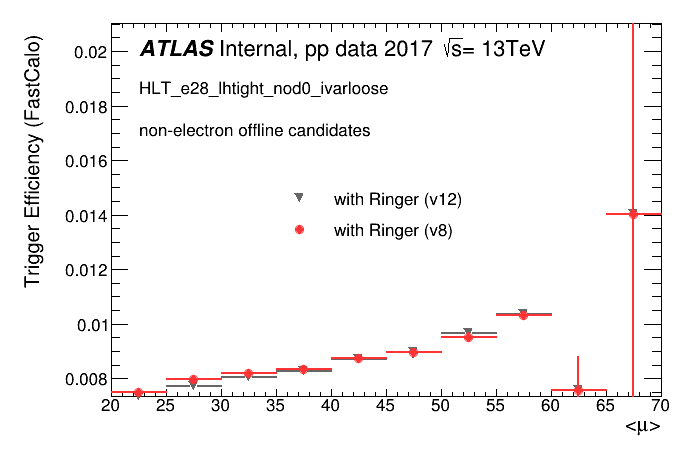

In [16]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            eff_data17_JF17_test.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%version, 'L2Calo','mu'),
            eff_data17_JF17_ref.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%ref, 'L2Calo','mu'),
        ]

hists = [ rpl.hist1d.rebin( h , 10, 20, 70 ) for h in hists ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '<#mu>', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, 'HLT_e28_lhtight_nod0_ivarloose', textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
add_legend( 0.38, 0.48, ['with Ringer (%s)'%version, 'with Ringer (%s)'%ref] )
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.5 )
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM7_e28_ringer_%s_2017_L2Calo_mu.pdf'%version)

In [17]:
eff_data17_JF17_ref.table('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%ref)

HLT_e28_lhtight_nod0_ringer_v8_ivarloose
+--------+----------+-----------------+
|  Step  | Eff [%%] |   passed/total  |
+--------+----------+-----------------+
| L1Calo | 90.6060  | 8384948/9254300 |
| L2Calo |  0.8360  |  77362/9254300  |
|   L2   |  0.7923  |  73320/9254300  |
| EFCalo |  0.6545  |  60568/9254300  |
|  HLT   |  0.0018  |   167/9254300   |
+--------+----------+-----------------+


In [18]:
eff_data17_JF17_test.table('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%version)

HLT_e28_lhtight_nod0_ringer_v12_ivarloose
+--------+----------+-----------------+
|  Step  | Eff [%%] |   passed/total  |
+--------+----------+-----------------+
| L1Calo | 90.6060  | 8384948/9254300 |
| L2Calo |  0.8239  |  76244/9254300  |
|   L2   |  0.7744  |  71663/9254300  |
| EFCalo |  0.6304  |  58338/9254300  |
|  HLT   |  0.0017  |   160/9254300   |
+--------+----------+-----------------+


## 3) HLT_e60:

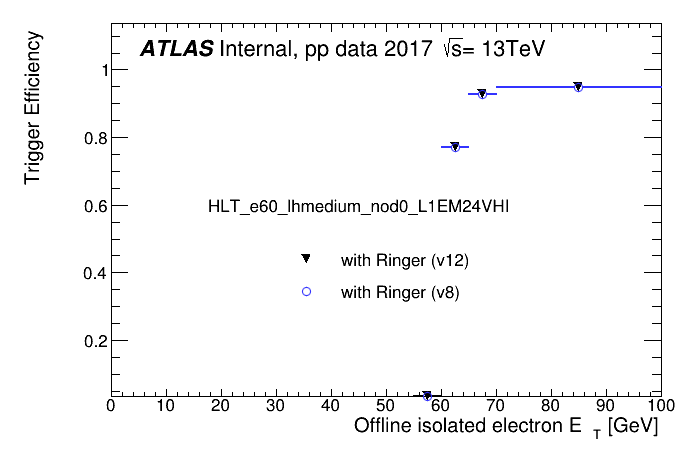

In [19]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_test.profile('HLT_e60_lhmedium_nod0_ringer_%s_L1EM24VHI'%version, 'HLT','et'),
            eff_data17_Zee_ref.profile('HLT_e60_lhmedium_nod0_ringer_%s_L1EM24VHI'%ref, 'HLT','et'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.39,0.35,['with Ringer (%s)'%version, 'with Ringer (%s)'%ref] )
rpl.add_text( 0.3, 0.55, 'HLT_e60_lhmedium_nod0_L1EM24VHI', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e60_ringer_%s_2017_HLT_et.pdf'%version)

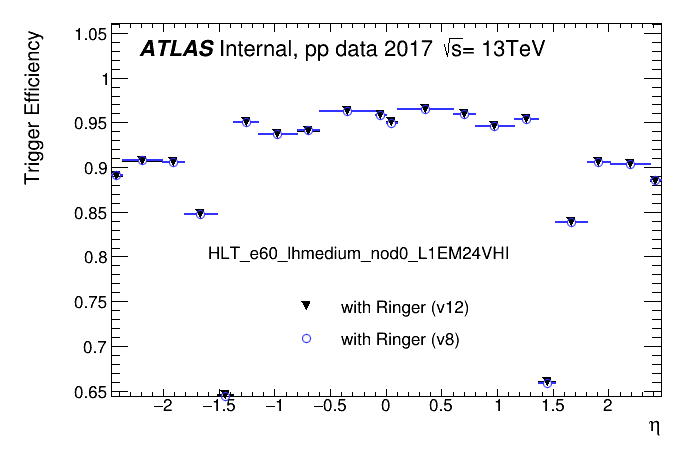

In [20]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_test.profile('HLT_e60_lhmedium_nod0_ringer_%s_L1EM24VHI'%version, 'HLT','eta'),
            eff_data17_Zee_ref.profile('HLT_e60_lhmedium_nod0_ringer_%s_L1EM24VHI'%ref, 'HLT','eta'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.39,0.25,['with Ringer (%s)'%version, 'with Ringer (%s)'%ref] )
rpl.add_text( 0.3, 0.45, 'HLT_e60_lhmedium_nod0_L1EM24VHI', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.1) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e60_ringer_%s_2017_HLT_eta.pdf'%version)

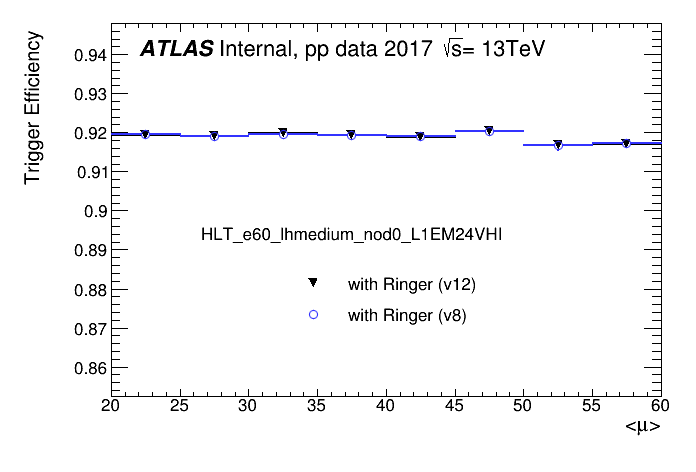

In [21]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_test.profile('HLT_e60_lhmedium_nod0_ringer_%s_L1EM24VHI'%version, 'HLT','mu'),
            eff_data17_Zee_ref.profile('HLT_e60_lhmedium_nod0_ringer_%s_L1EM24VHI'%ref, 'HLT','mu'),
        ]


hists = [ rpl.hist1d.rebin( h , 8, 20, 60 ) for h in hists ]


fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '<#mu>', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.4,0.3,['with Ringer (%s)'%version, 'with Ringer (%s)'%ref] )
rpl.add_text( 0.29, 0.49, 'HLT_e60_lhmedium_nod0_L1EM24VHI', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.03, yminf=0.93) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e60_ringer_%s_2017_HLT_mu.pdf'%version)

### 3.1) Check FasctCalo fake rejection

In [22]:
eff_data17_JF17_ref.table('HLT_e60_lhmedium_nod0_ringer_%s_L1EM24VHI'%ref)

HLT_e60_lhmedium_nod0_ringer_v8_L1EM24VHI
+--------+----------+-----------------+
|  Step  | Eff [%%] |   passed/total  |
+--------+----------+-----------------+
| L1Calo | 99.9012  | 7844422/7852181 |
| L2Calo |  0.8335  |  65446/7852181  |
|   L2   |  0.7826  |  61451/7852181  |
| EFCalo |  0.6158  |  48353/7852181  |
|  HLT   |  0.0026  |   203/7852181   |
+--------+----------+-----------------+


In [23]:
eff_data17_JF17_test.table('HLT_e60_lhmedium_nod0_ringer_%s_L1EM24VHI'%version)

HLT_e60_lhmedium_nod0_ringer_v12_L1EM24VHI
+--------+----------+-----------------+
|  Step  | Eff [%%] |   passed/total  |
+--------+----------+-----------------+
| L1Calo | 99.9012  | 7844422/7852181 |
| L2Calo |  0.8132  |  63857/7852181  |
|   L2   |  0.7556  |  59332/7852181  |
| EFCalo |  0.5819  |  45689/7852181  |
|  HLT   |  0.0024  |   189/7852181   |
+--------+----------+-----------------+


In [24]:
## 4) HLT_e140:

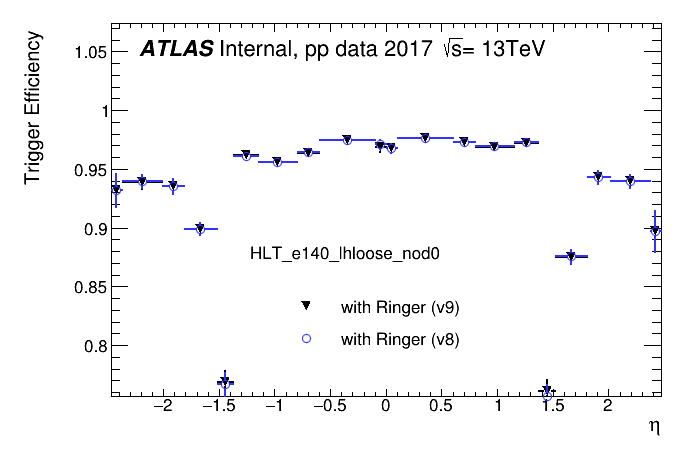

In [25]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_test.profile('HLT_e140_lhloose_nod0_ringer_%s'%version, 'HLT','eta'),
            eff_data17_Zee_ref.profile('HLT_e140_lhloose_nod0_ringer_%s'%ref, 'HLT','eta'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.39,0.25,['with Ringer (v9)', 'with Ringer (%s)'%ref] )
rpl.add_text( 0.36, 0.45, 'HLT_e140_lhloose_nod0', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.1) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e140_ringer_%s_2017_HLT_eta.pdf'%version)

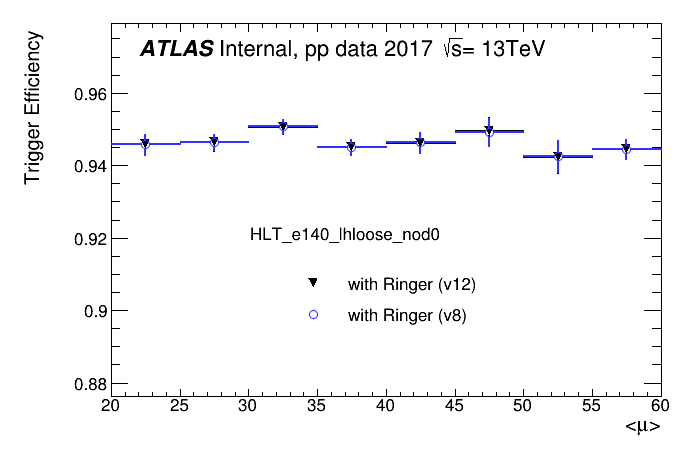

In [26]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_test.profile('HLT_e140_lhloose_nod0_ringer_%s'%version, 'HLT','mu'),
            eff_data17_Zee_ref.profile('HLT_e140_lhloose_nod0_ringer_%s'%ref, 'HLT','mu'),
        ]


hists = [ rpl.hist1d.rebin( h , 8, 20, 60 ) for h in hists ]


fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '<#mu>', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.4,0.3,['with Ringer (%s)'%version, 'with Ringer (%s)'%ref] )
rpl.add_text( 0.36, 0.49, 'HLT_e140_lhloose_nod0', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.03, yminf=0.93) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e140_ringer_%s_2017_HLT_mu.pdf'%version)

### 4.1) Chck FastCalo Fake rejection:

In [27]:
eff_data17_JF17_ref.table('HLT_e140_lhloose_nod0_ringer_%s'%ref)

HLT_e140_lhloose_nod0_ringer_v8
+--------+----------+-----------------+
|  Step  | Eff [%%] |   passed/total  |
+--------+----------+-----------------+
| L1Calo | 99.9227  | 5629684/5634041 |
| L2Calo |  2.0564  |  115858/5634041 |
|   L2   |  1.9617  |  110523/5634041 |
| EFCalo |  1.6871  |  95050/5634041  |
|  HLT   |  0.0488  |   2752/5634041  |
+--------+----------+-----------------+


In [28]:
eff_data17_JF17_test.table('HLT_e140_lhloose_nod0_ringer_%s'%version)

HLT_e140_lhloose_nod0_ringer_v12
+--------+----------+-----------------+
|  Step  | Eff [%%] |   passed/total  |
+--------+----------+-----------------+
| L1Calo | 99.9227  | 5629684/5634041 |
| L2Calo |  1.9191  |  108121/5634041 |
|   L2   |  1.8329  |  103268/5634041 |
| EFCalo |  1.5639  |  88112/5634041  |
|  HLT   |  0.0466  |   2627/5634041  |
+--------+----------+-----------------+
